# Data Science in Restaurant Analytics
This report analyzes a dataset of restaurant listings—including: Restaurant ID, Country Code, Longitude, Latitude, Average Cost for two, Price range, Aggregate rating, Votes, Restaurant Name, City, Address, Locality, Locality Verbose, Cuisines, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Rating colo', Rating text.

The goal is to uncover insights about restaurant ratings across different locations and cuisines to inform business decisions.

I will analyse trends and build predictive models from a restaurant data set in this data science project.

### Importing Libraries

In [1]:

#import the necessary libraries

import pandas as pd #we will utilise pandas for manipulating Data frames
import matplotlib.pyplot as plt # to help create plots for data visualisation
import seaborn as sns # to help create plots for data visualisation
import numpy as np #to manipulate numerical data

### Data Loading and Cleaning

In [2]:


# Now to import the Restaurant dataset
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')

df.head() # to view the first five rows to shows the structure of the dataset.

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

Now to conduct an exploration of the dimensions of the data set.

In [3]:

df.shape # To show the number of rows and columns in the dataset.

(9551, 21)

In [4]:

df.info() #this code extracts the number of non-null rows and the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 


Comparing the data type shown for each column with the dataset. All the columns have been stored with the correct dataset.

From the information given above, we can see that all the columns have values for each of their rows, except 'Cuisines'. The 'Cuisines' column has some null rows.

In [5]:

df.isnull().sum() # Now to confirm exactly how many null rows exists in each column

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# @title
df.describe().T

count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

The 'Cuisines' column has 9 null(empty) rows.

Some restaurants had a 0 aggregate rating.

Some restaurants had 0 votes. This could be why there were 0 aggregate ratings.ratings

Also, some restaurant's average cost for two was not recorded.

### Checking the distribution of the Target Variable
The target variable is 'Aggregate rating'. I will analyse the distribution and check for class imbalances

In [7]:
# @title
df['Aggregate rating'].value_counts() #This will give me a view of the values in the Aggregate rating column.

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [8]:
# @title
# Now, to check the skewness of the column.
# if Skewness > 0 - (Right Skewed), it means there are more low ratings
# if Skewness < 0 - (Left Skewed), it means there are more high ratings
df['Aggregate rating'].skew()

np.float64(-0.9541304733200109)

In [9]:
# @title
# To check the Kurtosis (tailedness) of the distribution. High Kurtosis means
# more outliers, low Kurtosis means less outliers.
from scipy.stats import kurtosis
df['Aggregate rating'].kurt()

np.float64(-0.582217137282445)

From the value count shown, restaurants with a 0.0 rating occur the most with a count of 2148, and restaurants with a  1.8 rating are the lowest with 1 count.

However, it is strange that a restaurant has a rating of 0.0. Since a restaurant's rating cannot be 0.0, it implies that those restaurants were not rated.

I will now obtain a visualisation of these values, plotting a histogram and a boxplot

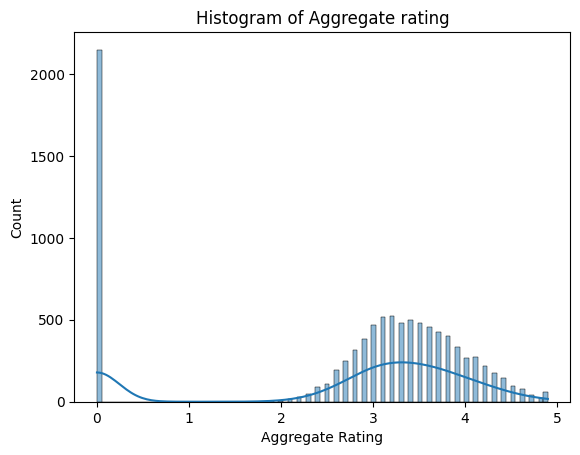

<Figure size 600x400 with 0 Axes>

In [10]:
# @title
num_bins = int(np.sqrt(len(df)))
plt.title('Histogram of Aggregate rating')
sns.histplot(x = df['Aggregate rating'], bins=num_bins, kde=True)
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.figure(figsize = (6,4))

plt.show()

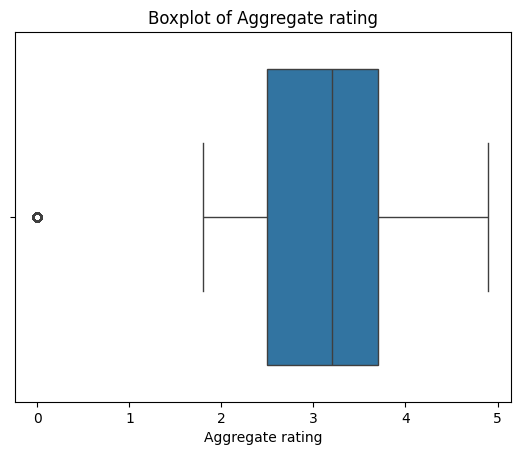

<Figure size 600x400 with 0 Axes>

In [11]:
# @title
# The boxplot will show us the median, quartiles and the outliers

sns.boxplot(x = df['Aggregate rating'])
plt.title('Boxplot of Aggregate rating')
plt.figure(figsize = (6,4))
plt.show()

The histogram shows that the data has a normal distribution.
The boxplot shows that the rating 0.0 is an outlier. Also we see that it the column is symmetric meaning it has a normal distribution


### Descriptive Analysis
Now, I would do some descriptive analysis on it


In [12]:
# @title
num_col = df.select_dtypes(include = 'number').columns.tolist() #
cat_col = df.select_dtypes(include = 'object').columns.tolist()

print ("Numerical Columns:" ,num_col)
print("Categorical Columns:", cat_col)

Numerical Columns: ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
Categorical Columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [13]:
# @title
df.describe(include = 'number').T

count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

In [14]:
# @title
#We do not need the restaurant id. Therefore I will remove it from the analysis

df[num_col].describe().T

count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

In [15]:
# @title
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

Checking the unique values of the country code, I can see that a few countries have the majority of restaurants rated.
I will now check the country with the highest number of restaurants

In [16]:
# @title
df['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

The rating was done for restaurants majorly in the country with code 8652. A google search reveals this is Russia

We can explore the categorical columns by doing a count of the number of occurrences. We will call it a frequency count.
This will help identify patterns in them.

In [17]:
# @title
for col in cat_col:
    frequency_count = df[col].value_counts().head(5)
    print(frequency_count)


Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64
Address
Dilli Haat, INA, New Delhi                                                    11
Sector 41, Noida                                                              11
Greater Kailash (GK) 1, New Delhi                                             10
The Imperial, Janpath, New Delhi                                               9
Food Court, 3rd Floor, Logix City Centre, Sector 32, Near Sector 34, Noida     8
Name: count, dtype: int64
Locality
Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Malviya Nagar       85
Name: count, dtype: int64
Locality Verbose
Connaught Place, New Delhi    122
Rajouri Garden, New Delhi      99
Shahdara, New Delhi            87
Defence Colony

Lets identify the top 5 most common Cuisines and Cities

In [18]:
# @title
df['City'].value_counts().head(5)

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

In [19]:
# @title
df['Cuisines'].value_counts().head(5)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [20]:
# @title
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

<ipython-input-21-b970f4275660>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = rating_col, order = sorted(rating_col.dropna().unique()), ax = axes[2], palette = 'viridis')
<ipython-input-21-b970f4275660>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation =45)


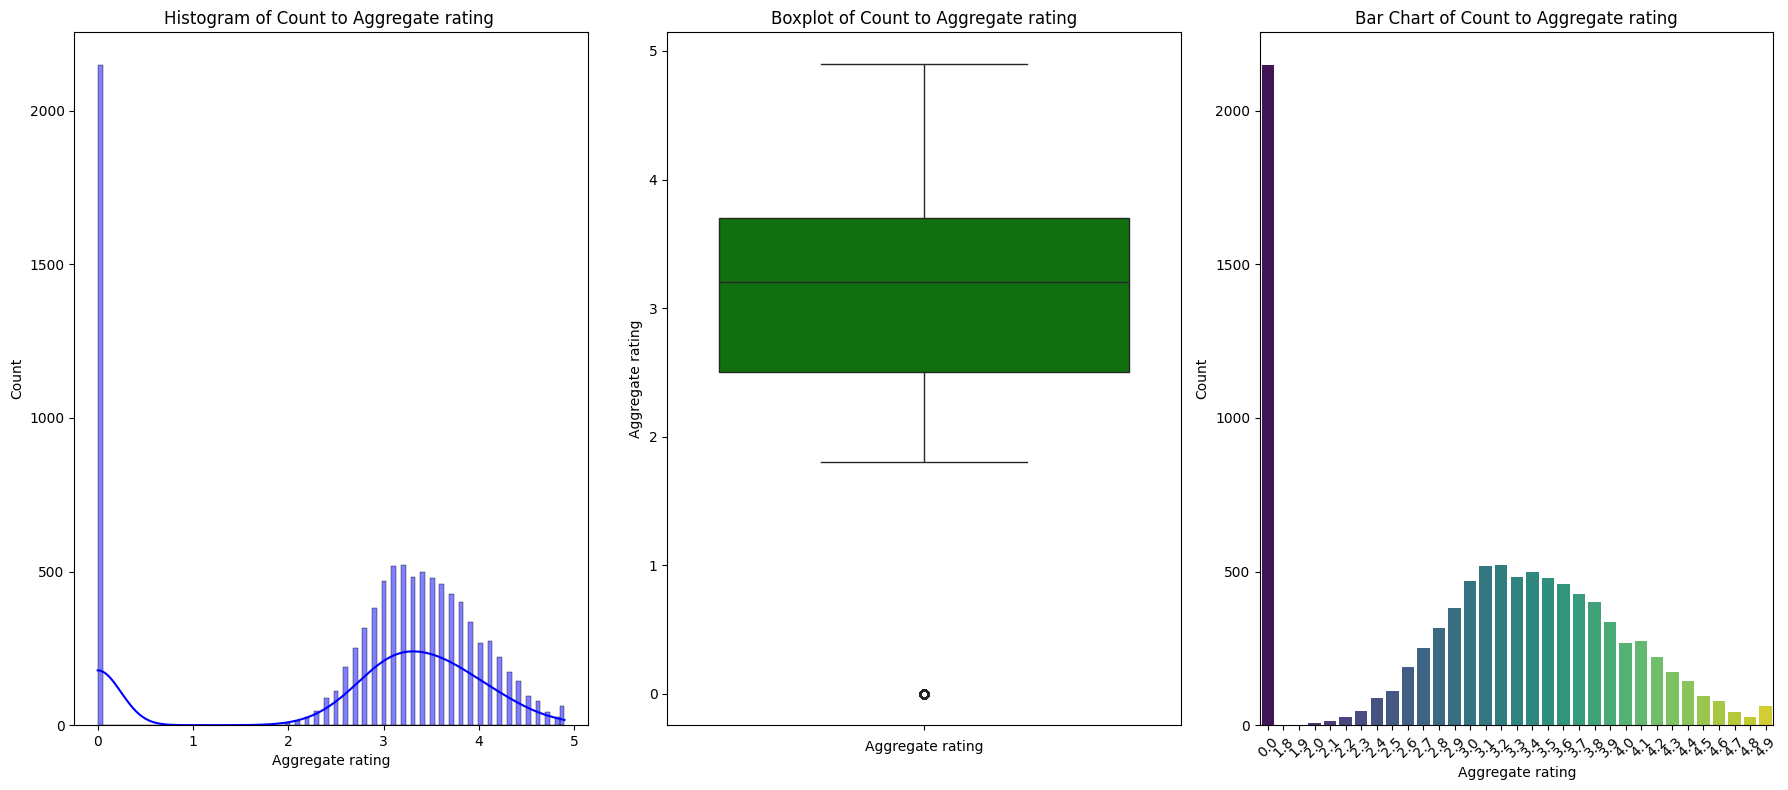

In [21]:
# @title
num_bins = int(np.sqrt(len(df)))

# We define the column to be plotted
rating_col = df['Aggregate rating']

#We will now set up our subplots. It will enable us compare the different plots
fig,axes = plt.subplots(nrows = 1, ncols= 3, figsize = (18,8))

# Lets make the plot for the histogram
sns.histplot(rating_col, kde=True, ax = axes[0], bins = num_bins, color = 'blue', edgecolor = 'black')
axes[0].set_title('Histogram of Count to Aggregate rating ')
axes[0].set_xlabel('Aggregate rating')
axes[0].set_ylabel('Count')


# Code for the Boxplot
sns.boxplot(data = rating_col, ax = axes[1], color = 'green') #Seaborn automatically drops null rows
axes[1].set_title('Boxplot of Count to Aggregate rating')
axes[1].set_xlabel('Aggregate rating')



# Now, will make the bar chart
sns.countplot(x = rating_col, order = sorted(rating_col.dropna().unique()), ax = axes[2], palette = 'viridis')
axes[2].set_title('Bar Chart of Count to Aggregate rating')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Aggregate rating')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation =45)

plt.tight_layout()
plt.show()



Here we will be analysing the Aggregate rating column across cities and Cuisines.

We will check only the 10 most popular cuisines to prevent overcrowding in the visualisation.

<ipython-input-22-c68303aaa1aa>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_values1, y=col, x='Aggregate rating', ax=axes[i, 0], estimator = np.mean, palette='magma')
<ipython-input-22-c68303aaa1aa>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45)
<ipython-input-22-c68303aaa1aa>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_values2, x=col, ax=axes[i, 1], palette='coolwarm')
<ipython-input-22-c68303aaa1aa>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

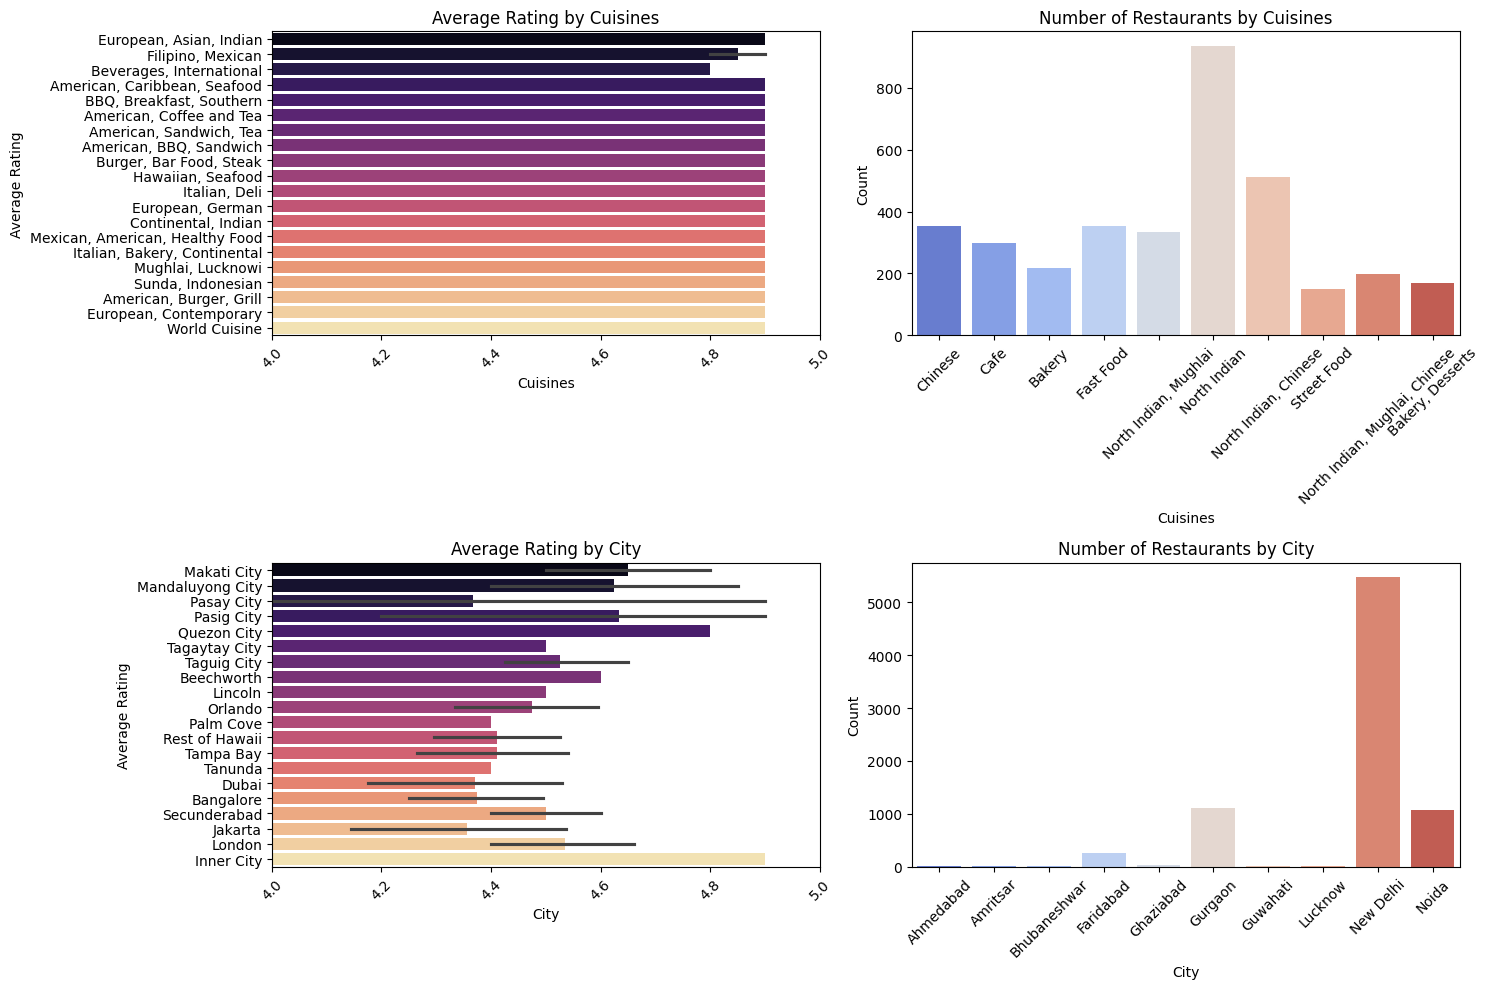

In [22]:
# @title
# We are analysing the average aggregate rating and the count of restaurants
# across cuisines and cities


# To define the categorical columns in preparation for visualisation
cat_col = ['Cuisines', 'City']

# To prepare the subplot. Subplots are used here in order to compare the plots, to derive insights more easily.

# Create subplots (1 row per category, 2 columns: Ratings & Counts)
fig, axes = plt.subplots(nrows=len(cat_col), ncols=2, figsize=(15, 10))

# Loop through categorical columns
for i, col in enumerate(cat_col):

  # Compute mean ratings for each category
    avg_rating = df.groupby(col)['Aggregate rating'].mean()

    # Select top 10 highest-rated categories
    top_values1 = avg_rating.sort_values(ascending=False).head(20).index
    filtered_values1 = df[df[col].isin(top_values1)].copy()
    filtered_values1 = filtered_values1.dropna(subset=['Aggregate rating'])  # Remove NaNs

   # Select top 10 most frequent categories for Count of Restaurant Bar Chart
    top_values2 = df[col].value_counts().head(10).index
    filtered_values2 = df[df[col].isin(top_values2)]

    # we are using bar plots here because we are trying to compare an average
    # value

    # Left Plot: Average Ratings
    sns.barplot(data=filtered_values1, y=col, x='Aggregate rating', ax=axes[i, 0], estimator = np.mean, palette='magma')
     # Adjust Y-Axis to Zoom in on Ratings between 4.0 and 5.0. This is where the top ratings lie
    axes[i, 0].set_xlim(4.0, 5.0)
    axes[i, 0].set_title(f'Average Rating by {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Average Rating')
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45)

    # Right Plot: Count of Restaurants in Each Category
    sns.countplot(data=filtered_values2, x=col, ax=axes[i, 1], palette='coolwarm')
    axes[i, 1].set_title(f'Number of Restaurants by {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=45)

# Adjust layout and show all plots together
plt.tight_layout()
plt.show()

We will now map the restaurant location using coordinates. We will analyse the distribution across cities and correlate location with ratings.

This analysis will help us:
i. See, in visuals, where the restaurants are located
ii. Analyse the relationship between location and rating.
iii. Check geographical patterns in restaurant quality

In [23]:
# @title
# First import folium for interactive maps
import folium

# We find the centre of the locations. This will be the starting point for the map
map_centre =[df['Latitude'].mean(), df['Longitude'].mean()]

# To create the map with Folium
restaurant_map = folium.Map(location = map_centre, zoom_start=5)

#Looping through restaurant rows
for _, row in df.iterrows():
  folium.CircleMarker(location = [row['Longitude'], row['Latitude']], radius = 2, color = 'blue', fill= True).add_to(restaurant_map)

restaurant_map

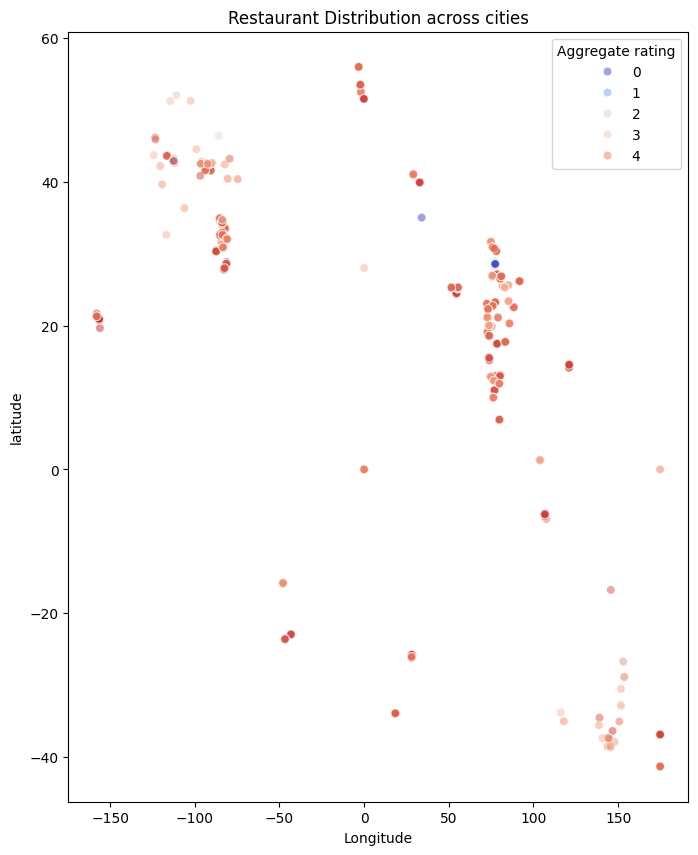

In [24]:
# @title
# Now, we will ratings of the restaurant by location

# With this, we can see the distribution of high rated restaurant

plt.figure(figsize= (8,10))
sns.scatterplot(data = df, x= 'Longitude', y = 'Latitude', hue = df['Aggregate rating'], palette='coolwarm', alpha = 0.5)
plt.title('Restaurant Distribution across cities')
plt.xlabel('Longitude')
plt.ylabel('latitude')

plt.show()


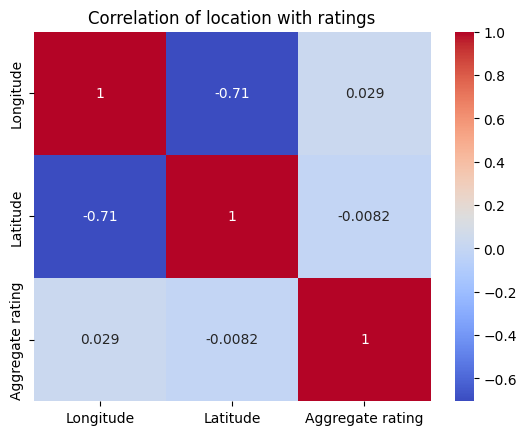

In [25]:
# @title
city_grouped = df.groupby('City')[['Aggregate rating', 'Longitude', 'Latitude']].mean().reset_index()

corr_matrix = city_grouped[['Longitude', 'Latitude', 'Aggregate rating']].corr()
sns.heatmap(data= corr_matrix, cmap = 'coolwarm', annot = True)
plt.title('Correlation of location with ratings')

plt.show()

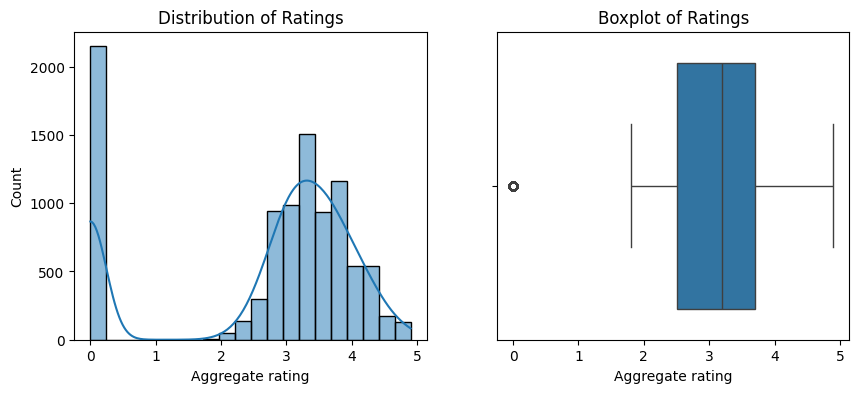

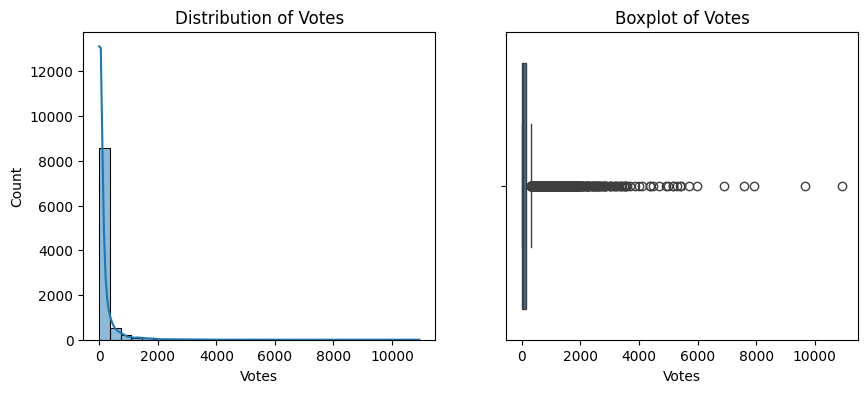

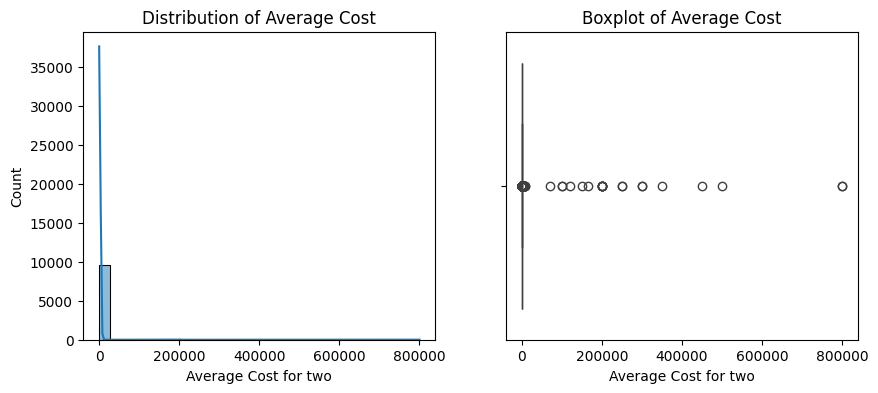

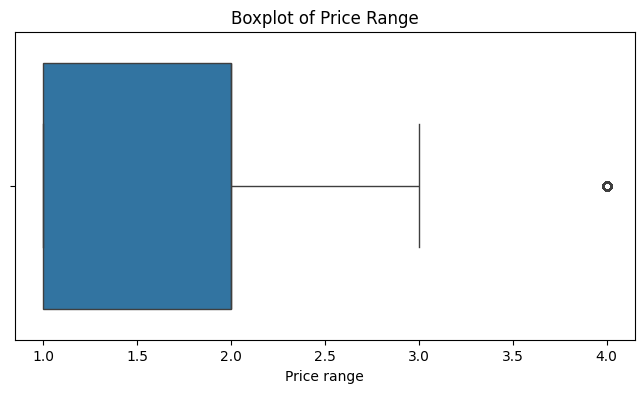

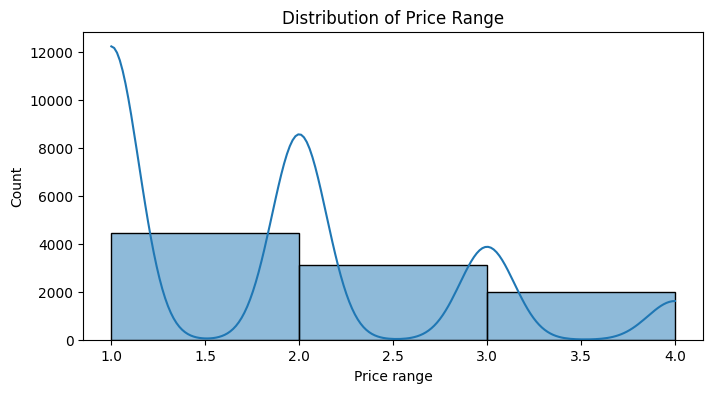

In [26]:
# @title
num_col = ['Aggregate rating', 'Votes', 'Average Cost for two', 'Price range']

plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['Aggregate rating'])
plt.title("Boxplot of Ratings")

plt.show()

plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['Votes'], bins=30, kde=True)
plt.title("Distribution of Votes")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['Votes'])
plt.title("Boxplot of Votes")

plt.show()

plt.figure(figsize=(10,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['Average Cost for two'], bins=30, kde=True)
plt.title("Distribution of Average Cost")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['Average Cost for two'])
plt.title("Boxplot of Average Cost")

plt.show()

#Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price range'])
plt.title("Boxplot of Price Range")
plt.show()

#Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Price range'], bins=3, kde=True)
plt.title("Distribution of Price Range")
plt.show()







Now for further analysis, we will identify the highest rated Cuisines. To conduct this analysis, we will convert the 0.0 rating for the Aggregate rating to NAN(null values).
Since we cannot say a 0.0 rating is valid, using it in our analysis will skew the dataset.

In [27]:
# @title
# Convert the 0.0 to null
df['Aggregate rating'].replace(to_replace=0.0, value=np.nan, inplace=True)

It is not possible for a rating to be 0.0. Therefore, I can understand that restaurants with an aggregate rating of 0.0 were not
rated.
If left unchecked, this imbalance will affect the analysis.

To surmount this challenge, the 0.0 value will be replaced with NaN(null).
This will prevent any misunderstanding in the dataset.

In [28]:
# @title
# to verify that there are now null values
df['Aggregate rating'].isnull().sum()

np.int64(2148)

 The 'Cuisines' column have only 9 null rows.
 Null values will affect the subsequent analysis negatively. Therefore, we will fill them with 'Unknown Cuisine'.  
 This will not affect our analysis since it is not the target variable.

In [29]:
# @title
# fill nullvalues with the string-'Unknown Cuisine'
df['Cuisines'].fillna('Unknown Cuisine', inplace = True) #to update the dataset, replacing the null rows in the 'Cuisines' column with its mode.

<ipython-input-29-01da66ec7b9a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown Cuisine', inplace = True) #to update the dataset, replacing the null rows in the 'Cuisines' column with its mode.


In [30]:
# @title
# to verify the effect of what was done.
df.isnull().sum() # all rows now have values in them.

Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                  0
Latitude                   0
Cuisines                   0
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating        2148
Rating color               0
Rating text                0
Votes                      0
dtype: int64

All done!

In [31]:
# @title
#To find the mean of the Aggregate rating and number of Votes for the Cuisines.
df.groupby('Cuisines').agg(Avg_rating = ('Aggregate rating', 'mean'), Count =('Votes', 'count')).sort_values( 'Avg_rating', ascending=False)

Avg_rating  Count
Cuisines                                               
European, Asian, Indian                      4.9      1
Continental, Indian                          4.9      1
American, Coffee and Tea                     4.9      1
Sunda, Indonesian                            4.9      3
Mexican, American, Healthy Food              4.9      1
...                                          ...    ...
Tibetan                                      NaN      2
Tibetan, Chinese, North Indian               NaN      2
Tibetan, South Indian, North Indian          NaN      1
Tibetan, Street Food                         NaN      1
Turkish, Arabian, Moroccan, Lebanese         NaN      1

[1826 rows x 2 columns]

The Burger, Bar Food, Steak Cuisines are the highest rated with 4.9 ratings. This is however misleading since they have just had 1 vote.

In [32]:
# @title
# Rating of the Cuisines with the highest votes

df.groupby('Cuisines').agg(Avg_rating = ('Aggregate rating', 'mean'), Count =('Votes', 'count')).sort_values( 'Count', ascending=False)


Avg_rating  Count
Cuisines                                                     
North Indian                                  3.181504    936
North Indian, Chinese                         3.117128    511
Fast Food                                     3.289035    354
Chinese                                       3.227232    354
North Indian, Mughlai                         3.281633    334
...                                                ...    ...
Healthy Food, American, Burger, Salad         3.400000      1
Cafe, Bakery, Tea, Vegetarian                 4.000000      1
Cafe, Belgian                                 3.900000      1
Hawaiian, Seafood                             4.900000      1
Healthy Food, European, Continental, Salad    3.600000      1

[1826 rows x 2 columns]

North Indian Cuisine was voted the most, but, has a low rating. This is because it is aggregated over the mean.

We can see that Cuisines with very low count have a high rating since we aggregate by their mean.
This results in a skewed analysis, by their mean.
This results in a skewed analysis, which could be misleading.

Therefore we will filter the Cuisines by the number of occurrences, where the number of votes should be greater than or equal to 50.
Now only more popular Cuisines with enough votes, representation are considered.

In [33]:
# @title
#
Rated_Cuisines = df.groupby('Cuisines').agg(Avg_rating = ('Aggregate rating', 'mean'), Count =('Votes', 'count')).sort_values( 'Avg_rating', ascending=False)

# Now the Cuisines will be filtered by the number of count they have

Filtered_Cuisines = Rated_Cuisines[Rated_Cuisines['Count']>=50]

Filtered_Cuisines.head(10)

Avg_rating  Count
Cuisines                                             
Italian                               3.950000     54
Desserts                              3.597500     53
Chinese, Thai                         3.516667     51
Bakery, Desserts, Fast Food           3.477049     63
Pizza                                 3.441176     53
Beverages                             3.438462     54
Ice Cream                             3.437778     74
Cafe                                  3.430159    299
Fast Food, Burger                     3.403571     56
North Indian, Chinese, Continental    3.403448     65

We see that Italian Cuisine is the highest rated here. For this analysis, italian cuisine will be taken as the highest rated.

In [34]:
# @title
# To check the popularity of the Cuisines
df.groupby('Cuisines')['Votes'].sum().sort_values( ascending=False).head(10)

Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

The North Indian and Mughlai Cuisines seem to be popular but have a low average rating. There is an opportunity for growth here if they can be improved.

We will compare the ratings across price points

In [35]:
# @title
# Comparing rating with price range
price_rating = df.groupby('Price range')[['Votes', 'Aggregate rating']].mean().sort_values('Aggregate rating', ascending=False).reset_index()

price_rating

Price range       Votes  Aggregate rating
0            4  368.595563          3.890957
1            3  443.860795          3.777276
2            2  147.607131          3.377167
3            1   44.597435          3.238885

<ipython-input-36-6360b155295a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_rating, x='Price range', y='Aggregate rating', palette='magma')


<Axes: xlabel='Price range', ylabel='Aggregate rating'>

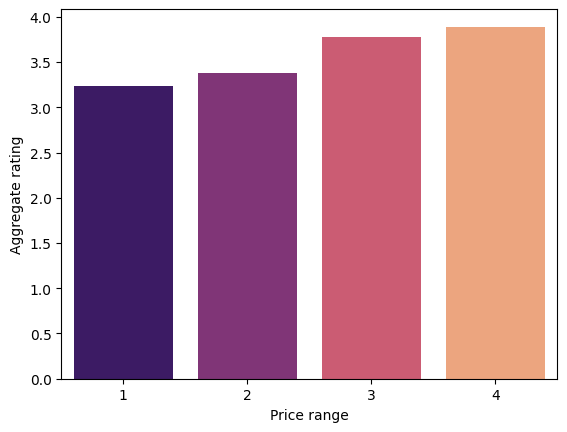

In [36]:
# @title
# barplot to show the distribution of the average of the aggregate rating over the price range
sns.barplot(data=price_rating, x='Price range', y='Aggregate rating', palette='magma')


In [37]:

# Comparing Average Cost for two with the Aggregate rating
df.groupby('Average Cost for two')[['Votes', 'Aggregate rating']].mean().sort_values('Aggregate rating', ascending=False).head(10)

Votes  Aggregate rating
Average Cost for two                          
500000                 605.0              4.90
1540                   441.0              4.90
3210                    85.0              4.90
190                    309.5              4.65
200000                1232.5              4.60
330                    352.0              4.60
260                    188.5              4.60
545                    892.0              4.60
165000                1476.0              4.60
955                    222.0              4.50


This is interesting. Lets group this into a percentile.

In [38]:
# @title
# grouping into percentiles
Average_Cost_Category = pd.qcut(df['Average Cost for two'], q=4, labels = ['Low', 'Medium', 'High', 'Luxury'])

df.groupby(Average_Cost_Category)[['Votes', 'Aggregate rating']].mean().sort_values('Aggregate rating', ascending=False)

<ipython-input-38-624c01b22e5c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(Average_Cost_Category)[['Votes', 'Aggregate rating']].mean().sort_values('Aggregate rating', ascending=False)


Votes  Aggregate rating
Average Cost for two                              
Luxury                391.165209          3.638384
Low                   120.107869          3.591393
High                  101.373730          3.272711
Medium                 49.930973          3.252575

From the two tables, we see that the highest priced restaurants are the most popular. Also, they had the highest rating.

Let's make a heat map to show the correlation between them.

<Axes: >

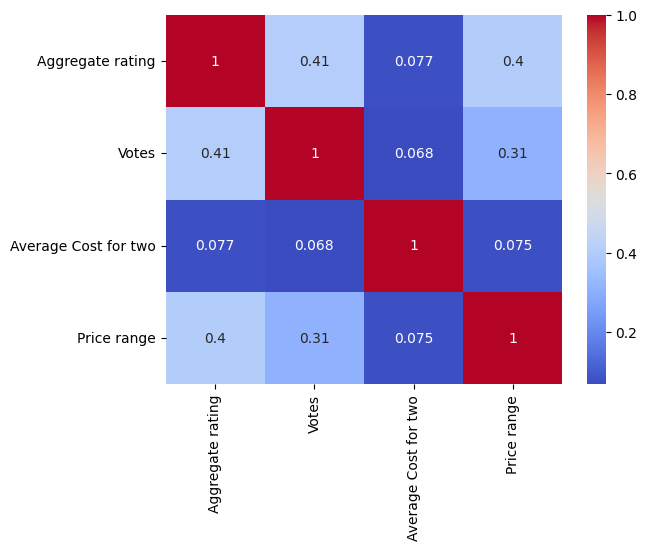

In [39]:
# @title
Corr_matrix2 = df[['Aggregate rating', 'Votes', 'Average Cost for two', 'Price range']].corr()

sns.heatmap(data = Corr_matrix2, cmap = 'coolwarm', annot =True)


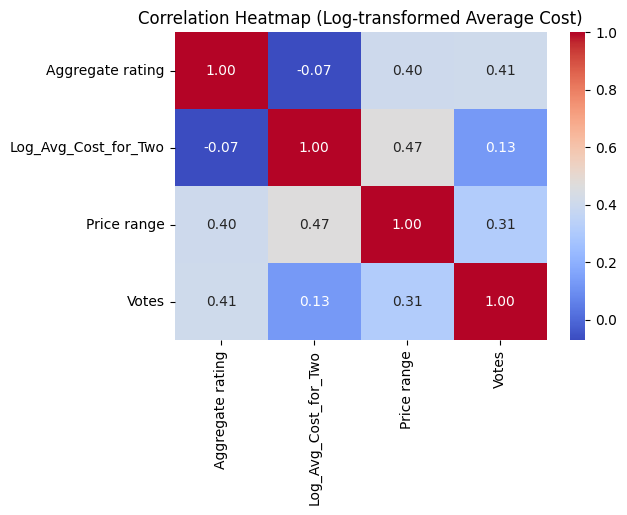

In [40]:
# @title
# Log-transform the 'Average Cost for two' column
df['Log_Avg_Cost_for_Two'] = np.log1p(df['Average Cost for two'])

# Compute the new correlation matrix
corr_matrix = df[['Aggregate rating', 'Log_Avg_Cost_for_Two', 'Price range', 'Votes']].corr()

# Plot the new heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap (Log-transformed Average Cost)')
plt.show()

Price range still has a moderate positive correlation with ratings, meaning higher-end restaurants get better reviews than lower-end restaurants.

Also, restaurants with more votes have better ratings. This shows that popularity also increases the ratings.

Average cost for two remains weakly correlated with both ratings and price range, indicating that restaurant pricing strategies vary within each category.

With the Log-Average Cost and Price Range (0.47, moderate positive correlation),
we can deduce that a higher price range is obtained with a higher average cost.

We did not get this insight earlier. Therefore this is ideal.

To convert Yes /No values to 1s and 0s for easier analysis

In [41]:
# @title
print(df['Has Table booking'].value_counts())
print(df['Has Online delivery'].value_counts())
print(df['Is delivering now'].value_counts())
print(df['Switch to order menu'].value_counts())


Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64
Is delivering now
No     9517
Yes      34
Name: count, dtype: int64
Switch to order menu
No    9551
Name: count, dtype: int64


In [42]:
# @title
print(df['Has Table booking'].unique())
print(df['Has Online delivery'].unique())
print(df['Is delivering now'].unique())
print(df['Switch to order menu'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No']


In [43]:

df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No':0})

df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No':0})

df['Is delivering now'] = df['Is delivering now'].map({'Yes': 1, 'No':0})

df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': 1, 'No':0})

df


Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...  Has Table booking  \
0     14.565443        French, Japanese, Desserts  ...                  1   
1     14.553708                          Japanese  ...                  1   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                  1   
3     14.585318                   Japanese, Sushi  ...                  0   
4     14.584450                  Japanese, Korean  ...                  1   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                  0   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                  0   
9548  41.055817            Italian, World Cuisine  ...                  0   
9549  41.057979                   Restaurant Cafe  ...                  0   

<ipython-input-44-8d2d45b2fb66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Has Table booking', palette = 'magma', ax=axes[0,0])
<ipython-input-44-8d2d45b2fb66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Has Online delivery', palette = 'magma', ax=axes[0,1])
<ipython-input-44-8d2d45b2fb66>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Is delivering now', palette = 'magma', ax=axes[1,0])
<ipython-input-44-8d2d45b2fb66>:16: FutureWarning: 

Passing `palette` without assigning

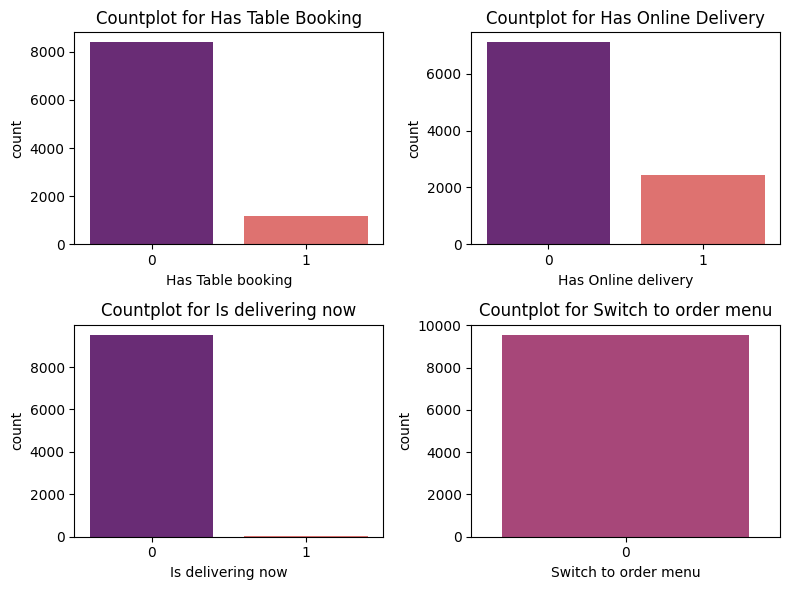

In [44]:
# @title
fig,axes= plt.subplots(2, 2, figsize = (8, 6))

axes[0,0].set_title('Countplot for Has Table Booking')
sns.countplot(data = df, x = 'Has Table booking', palette = 'magma', ax=axes[0,0])

axes[0,1].set_title('Countplot for Has Online Delivery')
sns.countplot(data = df, x = 'Has Online delivery', palette = 'magma', ax=axes[0,1])


axes[1,0].set_title('Countplot for Is delivering now')
sns.countplot(data = df, x = 'Is delivering now', palette = 'magma', ax=axes[1,0])


axes[1,1].set_title('Countplot for Switch to order menu')
sns.countplot(data = df, x = 'Switch to order menu', palette = 'magma', ax=axes[1,1])




plt.tight_layout()
plt.show()





1. The majority of restaurants do not have table booking available. Only a small proportion offer table booking services.


2. Most restaurants do not provide online delivery.
Some restaurants offer online delivery, though they are outnumbered.

3. Very few restaurants are currently delivering at the moment.


4. No restaurants have switched to an order menu.


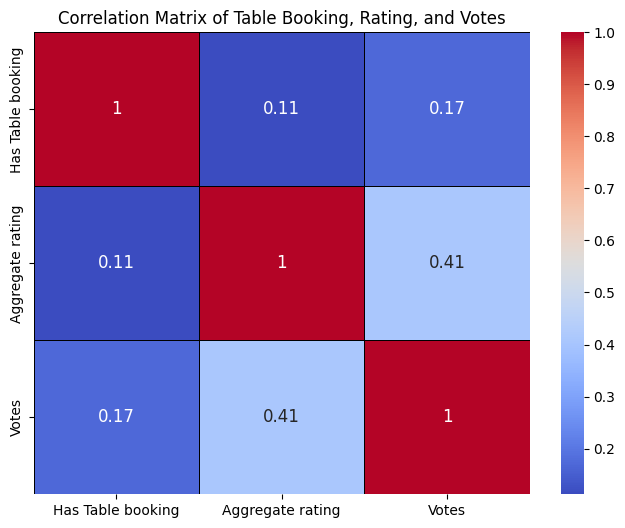

In [45]:
# @title
# Generate correlation matrix
corr_matrix3 = df[['Has Table booking', 'Aggregate rating', 'Votes']].corr()

# Create heatmap with adjustments
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility
sns.heatmap(data=corr_matrix3, annot=True, cmap='coolwarm',
            annot_kws={"size": 12},  # Adjust annotation size
            linewidths=0.5, linecolor='black')  # Add cell borders

plt.title('Correlation Matrix of Table Booking, Rating, and Votes')
plt.show()

The Table booking has little effect on ratings or votes. It has a positive correlation, but not much. This means customers may not make this feature a priority when rating restaurants.

Higher-rated restaurants tend to get more votes. This means good service makes restaurants popular.

In [46]:
# @title
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Log_Avg_Cost_for_Two'],
      dtype='object')

In [47]:
# @title
df


Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...  Has Table booking  \
0     14.565443        French, Japanese, Desserts  ...                  1   
1     14.553708                          Japanese  ...                  1   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                  1   
3     14.585318                   Japanese, Sushi  ...                  0   
4     14.584450                  Japanese, Korean  ...                  1   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                  0   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                  0   
9548  41.055817            Italian, World Cuisine  ...                  0   
9549  41.057979                   Restaurant Cafe  ...                  0   

### Feature Engineering

Here we will extract data for prediction. To do this, we must convert it into useful features to improve prediction accuracy.



First, we drop the columns we do not need. These columns are too unique. They do not have pattern that we can use.

In [48]:
# @title
df.drop(columns = ['Restaurant Name', 'Restaurant ID', 'Address', 'Rating color', 'Rating text'], inplace=True)

Data Encoding

In [49]:

#Convert categorical variables into numerical values (Encoding).

cat_col = ['City', 'Locality', 'Locality Verbose','Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now','Switch to order menu','Price range' ]

df = pd.get_dummies(df, columns =cat_col, drop_first=True)




Here we would simplify the Cuisines column by grouping less frequent cuisines.
Then encode them.

We would also add new features like total cuisine count and a group restaurants based on cost. Restaurants with an avergae cost for two greater than 500 is a high cost restaurant.


In [50]:

df['Cuisines_Original'] = df['Cuisines'].copy()  # We create a copy to preserve original cuisines

# Now, we will choose top 5 Cuisines based on the number of occurrences

top_cuisines = df['Cuisines'].value_counts().nlargest(5).index

df['Cuisines'] = df['Cuisines'].apply(lambda x: x if x in top_cuisines else 'Other')
df = pd.get_dummies(df, columns=['Cuisines'], drop_first=True) # Now to encode it.

# New features: Total cuisine count
df['Total_cuisines'] = df['Cuisines_Original'].apply(lambda x: len(x.split(','))) # Calculating the number of Cuisines offered by a restaurant.

# High-cost restaurant classification
df['High_cost'] = (df['Average Cost for two'] > 500).astype(int)

#Drop the copy of the original cuisines
df.drop(columns=['Cuisines_Original'], inplace=True)

# Check the new features
df.head()

Country Code   Longitude   Latitude  Average Cost for two  \
0           162  121.027535  14.565443                  1100   
1           162  121.014101  14.553708                  1200   
2           162  121.056831  14.581404                  4000   
3           162  121.056475  14.585318                  1500   
4           162  121.057508  14.584450                  1500   

   Aggregate rating  Votes  Log_Avg_Cost_for_Two  City_Agra  City_Ahmedabad  \
0               4.8    314              7.003974      False           False   
1               4.5    591              7.090910      False           False   
2               4.4    270              8.294300      False           False   
3               4.9    365              7.313887      False           False   
4               4.8    229              7.313887      False           False   

   City_Albany  ...  Price range_2  Price range_3  Price range_4  \
0        False  ...          False           True          False   
1        False  ...          False           True          False   
2        False  ...          False          False           True   
3        False  ...          False          False           True   
4        False  ...          False          False           True   

   Cuisines_Fast Food  Cuisines_North Indian  Cuisines_North Indian, Chinese  \
0               False                  False                           False   
1               False                  False                           False   
2               False                  False                           False   
3               False                  False                           False   
4               False                  False                           False   

   Cuisines_North Indian, Mughlai  Cuisines_Other  Total_cuisines  High_cost  
0                           False            True               3          1  
1                           False            True               1          1  
2                           False            True               4          1  
3                           False            True               2          1  
4                           False            True               2          1  

[5 rows x 2642 columns]

###Model Building:

Here we will Predict Restaurant Ratings by training a machine learning model  to predict restaurant ratings based on price, cuisine, location, and services.

Now we will install XGBoost and import all the libraries we will need.



In [51]:
!pip install -q xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


Now, we load the dataset into X and Y DataFrames and then split it into X (everything except the target) and y (the target).

In [52]:


# ... (Your existing code for data loading and feature engineering) ...

X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

**Train/Test Split**

We use 20% of the data to test the model to know how it will perform on unseen examples.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Here we will replace missing data with the average rating from the training set.

imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

In [55]:
# Linear Regression for a quick modelling.
lr_model = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [56]:

# Random Forest will help model nonlinear relationships.
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [57]:
# XGBoost will help improve the performance high‑performance
xgb_model = XGBRegressor(random_state=42).fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

### Model Evaluation:

Here we will measure the Performance of the model and see how well it predicts restaurant ratings.

We evaluate to see which one performs best.

Our evaluation is based on three measurements:

**RMSE (Root Mean Squared Error)**: This tells gives us the average difference our prediction have from the true values.
If it is low, then it means the model's predictions are closer to the actual values.

**MAE (Mean Absolute Error)**: We will use this evaluation to give us an average of the differences between predicted and actual values.
However, here we get the mean of the absolute value of the difference.

Also, here the lower the value, the better for us.

**R² (R-squared)**: This tells us how well the model explains the data.
The higher the R², the better.

1 means perfect predictions, while 0 means the model is false.

In [58]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Evaluate each model
models = [lr_model, rf_model, xgb_model]
model_names = ["Linear Regression", "Random Forest", "XGBoost"]
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    rmse, mae, r2 = evaluate_model(y_test, y_pred)

    print(f"{name} Metrics (RMSE, MAE, R²): {(rmse, mae, r2)}")

Linear Regression Metrics (RMSE, MAE, R²): (np.float64(0.36176874627652084), 0.2732580245286746, 0.4277759119352099)
Random Forest Metrics (RMSE, MAE, R²): (np.float64(0.3040291273050352), 0.1971619126204924, 0.5958575854325687)
XGBoost Metrics (RMSE, MAE, R²): (np.float64(0.30971064758930905), 0.20360333509743284, 0.5806116920861198)


The Random Forest model performs the best. It has the lowest RMSE and MAE and also the highest R².

XGBoost is close to Random Forest but slightly behind.

The Linear Regression is simple and quick, but does not perform as well as Random Forest and XGBoost.

We will go with the Random Forest model

High R² → The model explains most of the variation in restaurant ratings.

Low MAE/RMSE → Predictions are close to actual ratings